In [171]:
import numpy as np
import pandas as pd
from Module import Lineaire, MSE
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Linear regression
Let's start by preparing the data. We will use Boston dataset.

In [172]:
columns = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO','B','LSTAT', 'MEDV'])
data = pd.read_csv("housing.data", sep=r'\s{1,}', engine="python", names=columns, dtype='float')

Let's visualise the dataset a little. Let's plot a subset of variables one-vs-one to find pair of variables that are quite correlated. Variables NOX and INDUS seems to be correlating (that makes reason), so let's use them to test linear regression.

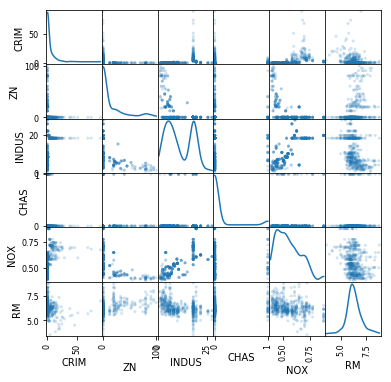

In [173]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[data.columns[:6]], alpha = 0.2, figsize = (6, 6), diagonal = 'kde');

In [236]:
variables = data[['NOX']].values
biaised_X = np.concatenate((np.ones(data.shape[0]).reshape(-1,1), variables), axis=1)
X_train, X_test, y_train, y_test = train_test_split(biaised_X, 
                                                    data['INDUS'].values, 
                                                    test_size=0.5, random_state=42)

In [249]:
dim_in = 2
dim_out = 1

epsilon = 0.001

model = Lineaire(dim_in, dim_out)
model.initialize_parameters()

loss = MSE()

errors = []
test_errors = []
for epoch in range(1000):   
    for batch in np.array_split(np.arange(len(X_train)), 10):
        model.grad_zero()
        n = len(batch)
        X = torch.from_numpy(X_train[batch].reshape(-1,n)).float()
        y = torch.from_numpy(y_train[batch].reshape(-1,n)).float()
        
        X_t = torch.from_numpy(X_test[batch].reshape(-1,n)).float()
        y_t = torch.from_numpy(y_test[batch].reshape(-1,n)).float()

        yhat = model.forward(X)
        err = loss.forward(y,yhat)
        
        yhat_test = model.forward(X_t)
        test_err = loss.forward(y_t,yhat_test)
            
        delta_Z = loss.backward(y,yhat)
        model.backward_update_gradient(X , delta_Z)
        model.update_parameters(epsilon)
    errors.append(err)
    test_errors.append(test_err)
print(model.W)

tensor([[6.5839],
        [7.4651]])


## Visual evaluation
So let's plot NIX ~ INDUS to see, if learned model is useful or not.

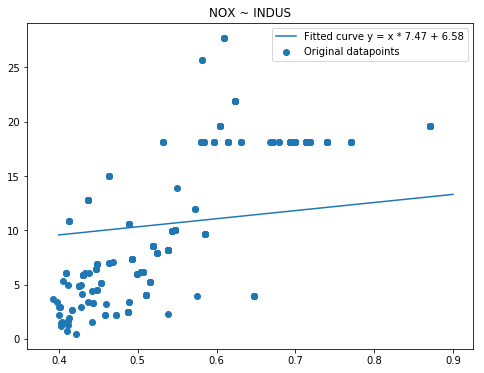

In [250]:
plt.figure(figsize=(8,6))
plt.title("NOX ~ INDUS")
plt.scatter(X_test[:,1], y_test, label="Original datapoints")
artificiel_x = np.linspace(0.4,0.9,100)
a = model.W.tolist()[1][0]
b = model.W.tolist()[0][0]
plt.plot(artificiel_x, artificiel_x * a + b, label="Fitted curve y = x * " +str(round(a,2))+" + " + str(round(b,2)))
plt.legend();

## Quantitative evaluation
Model was visually giving something useful. Let's plot next the error in training and test.

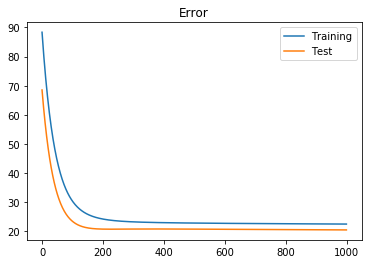

In [251]:
plt.figure()
plt.title("Error")
plt.plot(list(range(len(errors))), errors, label="Training")
plt.plot(list(range(len(test_errors))), test_errors, label="Test")
plt.legend();

In [229]:
errors

[tensor(48.2253),
 tensor(83.6593),
 tensor(82.2654),
 tensor(80.9046),
 tensor(79.5759),
 tensor(78.2787),
 tensor(77.0123),
 tensor(75.7757),
 tensor(74.5684),
 tensor(73.3896),
 tensor(72.2386),
 tensor(71.1149),
 tensor(70.0176),
 tensor(68.9462),
 tensor(67.9001),
 tensor(66.8786),
 tensor(65.8811),
 tensor(64.9071),
 tensor(63.9561),
 tensor(63.0273),
 tensor(62.1205),
 tensor(61.2349),
 tensor(60.3700),
 tensor(59.5255),
 tensor(58.7008),
 tensor(57.8954),
 tensor(57.1088),
 tensor(56.3407),
 tensor(55.5905),
 tensor(54.8578),
 tensor(54.1423),
 tensor(53.4435),
 tensor(52.7610),
 tensor(52.0943),
 tensor(51.4433),
 tensor(50.8074),
 tensor(50.1862),
 tensor(49.5796),
 tensor(48.9870),
 tensor(48.4082),
 tensor(47.8428),
 tensor(47.2905),
 tensor(46.7510),
 tensor(46.2241),
 tensor(45.7093),
 tensor(45.2064),
 tensor(44.7152),
 tensor(44.2353),
 tensor(43.7664),
 tensor(43.3084),
 tensor(42.8609),
 tensor(42.4238),
 tensor(41.9967),
 tensor(41.5794),
 tensor(41.1717),
 tensor(40

In [239]:
X_train.shape

(253, 2)